In [1]:
# satndarad imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
what_were_covering = [
    "0. An end-to-end Scikit-Learn workflow",
    "1. Getting the data ready",
    "2. Choose the right estimator/algorithm for our problems",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained model",
    "7. Putting it all together!"]

## 1. Getting our data ready to be used with machine learning

**Three main things we have to do:-**
1. Split the data into features and labes (as X and y)
2. Filling (also called imputing) or disregarding misssing values
3. Converitng non-numeric values into numerical values( also called as feature encoding)

In [3]:
heart_disease=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/heart-disease.csv')

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# splitting the data into X and y

# X - features matrix oatined by removing the target column(axis=1)
X=heart_disease.drop('target',axis=1)

# y-tqrget column
y=heart_disease['target']

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [25]:
# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#test_size=20%(data)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
X.shape

(303, 13)

In [28]:
len(heart_disease)*0.8
# 80% of data as train set

242.4

*Clean data -> Transform Data -> Reduce Data*

Why Clean the data?
- bcz we might have missing values in our data and these missing values might not hep us in buiding the right ML model. Therefore we perform some imputations on these missing values.

Data transformation
- Since computers only understand 0 or 1's, we want to transform the data into some sort of form that computers can understand.

Reduce data
- Sometimes also called as dimensionality redcution - reduce columns...

### 1.1 Make sure it's all numerical

In [2]:
car_sales=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
# split the data into X and y
X=car_sales.drop('Price',axis=1)
y=car_sales['Price']

In [33]:
# split into training and test sets
X_train,X_tes,y_train,y_test=train_test_split(X,
                                             y,
                                             test_size=0.2)

In [34]:
# build a ML model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [35]:
car_sales["Doors"].value_counts()

Doors
4    856
5     79
3     65
Name: count, dtype: int64

Therefore, doors column is categorical

In [36]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()

# we've used the transformer which says, take the one hot encoder and encode the 
# categorical features and for the remainder of the columns, just passthrough don't do anything
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                                remainder="passthrough")

transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
# another way to one hot encode
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]],dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# refit the model
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(transformed_X,
                                              y,
                                              test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value(also known as imputation)
2. Remove the samples with missing data altogether.

   There's no exact way to fill missing values except a few rules to fill numerical and categorical values differently.

In [41]:
# import car sales missing data
car_sales_missing=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
car_sales_missing.isna().sum()
# this shows us the number of missing values 

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [44]:
# let's try and convert into numbers

# create X and y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [45]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [46]:
# let's try and convert into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([
    (
        'one_hot',
         one_hot,
         categorical_features
    )],remainder='passthrough'
)
transformed_X=transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [47]:
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [48]:
car_sales_missing['Doors'].mode()[0]

4.0

#### Option 1: Fill missing data with Pandas

In [49]:
# fill Make column 
car_sales_missing['Make'].fillna('missing',inplace=True)

# fill colour column
car_sales_missing['Colour'].fillna('missing',inplace=True)

# fill odometer column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

# fill doors column
car_sales_missing['Doors'].fillna(car_sales_missing['Doors'].mode()[0],inplace=True)

In [50]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [51]:
# remove rows with missing Price values and rest other rows remain as they are imputed
# bcz its hard to predict the price of missing values
car_sales_missing.dropna(inplace=True)

In [52]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
len(car_sales_missing)
# we've lost 50 samples

950

**Feature scaling** : Once the data is all in numeric format, we should also perform feature scaling i.e. making sure all numerical data is on the same scale because a ML algo may have problem finding patterns in the wide-ranging variables.

2 types of feature scaling:-
1. Normalization (MinMxScaling) - rescales all numerical values between 0(lowest value) and 1(highest value)
2. Standardization

Note:
- Feature scaling isn't required for target variable
- It is not usually required for tree based models.

#### Option 2: Fill missing values with Scikit-Learn

The main takeaways:

- Split your data first (into train/test), always keep your training & test data separate
- Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)
- Don't use data from the future (test set) to fill data from the past (training set)

In a nutshell, the video shows filling and transforming the entire dataset (X) and although the code works and runs, it's best to fill and transform training and test sets **separately**.

In [54]:
car_sales_missing=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
# drop rows which have nan in price column
car_sales_missing.dropna(subset=['Price'],inplace=True)

In [57]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [58]:
# split into X and y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

# split data into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

In [59]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values seperately to ensure training data stays with training data and test data with test data.

**Notice:** We use `fit_transform()` on training data and `transform()` on test data. i.e.
we learn the patterns in training set and transform it via imputation( fit then transform). Then we take those same patterns and filll the test set(transform only).

In [60]:
# fill missing values with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fiil categorical valueas with missing anf numerical values with mean
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

# define columns
cat_features=['Make','Colour']
door_feature=['Doors']
num_features=['Odometer (KM)']

# create an imputer (soomething that fils missing values)
imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('door_imputer',door_imputer,door_feature),
    ('num_imputer',num_imputer,num_features)
])

#fill train and set values seperately
filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.transform(X_test)
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

Understanding the above code:
1. Fisrt we have imported the SimpleImputer and ColumnTransformer
2. We define imputers which takes startegy and fill_value. If strategy is constant(means for every missing cell do the same thing, then we need to specify the fill_value
   cat_imputer means hey imputer go to the cat_features and replace missing values with fill_value
3. Define column which are categorical and numeric
4. We create an imputer passing it the imputation/transformations we want to do.
   We use ColumnTransformer which takes a list of transformers and the name of the imputer is given so that we can access the imoputer later on.



In [61]:
#get our transformed data arrays back into dataframes
car_sales_filled_train=pd.DataFrame(filled_X_train,
                                   columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled_test=pd.DataFrame(filled_X_test,
                                   columns=['Make','Colour','Doors','Odometer (KM)'])

In [62]:
#check missing values in fillled X_train and X_test
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [63]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

Now we have no missing values and now we can convert these into numbers.

Again, keeping our training and test data seperately.

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot=OneHotEncoder()
cat_features=['Make','Colour','Doors']

transformer=ColumnTransformer([
    ('one_hot',one_hot,cat_features)
],
                             remainder='passthrough'# i forgot this
                             )

# fill train and test values seperately
transformed_X_train=transformer.fit_transform(car_sales_filled_train) #fit and transform the training data
transformed_X_test=transformer.transform(car_sales_filled_test) #transform the test data

transformed_X_train.toarray()


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [65]:
transformed_X_test.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.97610e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.79750e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.97664e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.08569e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.01190e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.11630e+04]])

In [66]:
# now we've got our data as numbers and filled (no missing values)
# let's fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()

model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.21229043336119102

This model has a score less than the previous model beacuse it has 50 training examples dropped.

## 2. Choosing the right estimator / algorithm for our problem.

Some things to note:

* Sklearn refers to ML modles, algorithms as estimators( which includes regressors and classifiers)
* Classification problem - predicting a category (heart disease or not)
  * Sometiems you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

  If you're working on a ml problem and looking to use Sklearn and not sure what model you should use, refer to the sklearn ml map:
<img src='https://scikit-learn.org/stable/_static/ml_map.png'/>

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset.

In [4]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing # which is a dictionary

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
# convert it into a dataframe
housing_df=pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
# add a target column to the housing df
housing_df['target']=housing['target']
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [70]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


I selected the model based on the sklearn cheatsheet and at the point 'few features should be important', i have no answer, therefore i experiment with the models/estimators in the green boxes.

You can try these estimatots and compare them and then select the best estimator for your problem.

In [71]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# set up random seed
np.random.seed(42)

# create data
X=housing_df.drop('target',axis=1)
y=housing['target'] # median house price in $100,000s

# split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

#instantiate and fit the model (on training data set)
model=Ridge()
model.fit(X_train,y_train)

# check the score of the model 
model.score(X_test,y_test) # returns the coefficient of determination 
# meaning how predictive are these features for the target values

0.5758549611440126

$R^2$ (coefficeint of determination) is the deafault regression evaluation metric in sklearn for regression models.

Improving the model score by trying out another estimator from the scikit-learn map
I'll take the ElasticNet estimator

In [72]:
# import the estimator/algorithm
from sklearn.linear_model import ElasticNet

# create data
X=housing_df.drop('target',axis=1)
y=housing_df.target

# set up random seed
np.random.seed(42)

# split the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate the model
model=ElasticNet()

# fit the model on train set
model.fit(X_train,y_train)

# check model score
model.score(X_test,y_test)

0.416551890980282

Model score has decresaed. Therefore, this is not a good model.

In [73]:
# import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# set up random seed
np.random.seed(42)

# create data
X=housing_df.drop('target',axis=1)
y=housing['target'] # median house price in $100,000s

# split into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

#instantiate and fit the model (on training data set)
model=RandomForestRegressor()
model.fit(X_train,y_train)

# check the score of the model 
model.score(X_test,y_test) # returns the coefficient of determination 
# meaning how predictive are these features for the target values

0.8057036267903255

## 2.2 Picking a machine learning model for a classification problem

In [74]:
# heart disease dataset
heart_disease=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
len(heart_disease)

303

Using the map, we reached LinearSVC estimator to be tried as our model.

In [76]:
# import estimator
from sklearn.svm import LinearSVC

# set up random seed
np.random.seed(42)

# create data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate and fit the classifier
clf=LinearSVC()
clf.fit(X_train,y_train)

#evaluate the classifier
clf.score(X_test,y_test)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [77]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

Next try the RandomForestClassifier

In [78]:
# import estimator
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# create data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate and fit the classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#evaluate the classifier
clf.score(X_test,y_test)

0.8524590163934426

Tidbit:

    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [79]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together!']

## 3. Fit the model/algorithm and use it to make predictions on our data

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, feature variables, data
* `y` = target, labels, target variables

In [80]:
import numpy as np
import pandas as pd

In [81]:
# import estimator
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# create data
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']

# split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate and fit the classifier
clf=RandomForestClassifier()

# fit the model to the data (training the ml model)
clf.fit(X_train,y_train)

#evaluate the classifier (use the patterns the model has learned)
clf.score(X_test,y_test)

0.8524590163934426

The model  fitting or training figures out the patterns between features in the training dataset and how these relate to their corresponding labels during.

You can go deep and find out how each model/estimator works.

What's hapenning in the `score()` under the hood is that the model is making predictions on the X_test and giving somewhat y_pred which is then compared to the y_test.

### 3.2 Make predictions using a ML model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [82]:
X_test.shape

(61, 13)

In [83]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [84]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [85]:
# compare predictions to the truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test) # for each sample above, did our model actually predcit that label

0.8524590163934426

In [86]:
# another way (2)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [87]:
# third way
clf.score(X_test,y_test)

0.8524590163934426

Make predictions using `predict_proba()`


In [88]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

`predict_proba()` returns the probability of a label being true.

In [89]:
# let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [90]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


The sample at index 0 in X_test has 0.89 probability of the label being zero and so on for the reamining samples.

When we use `predict()`, it returns a single label for each sample and `predict_proba()` returns the probabilty of classification labels.

Threshold = 0.5 and sum of probabilities = 1.

Make predictions on regression problem

`predict()` can also be used on regression problems

In [91]:
# import estimator
from sklearn.ensemble import RandomForestRegressor

# set up random seed
np.random.seed(42)

# create data
X=housing_df.drop('target',axis=1)
y=housing_df.target

# split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

#instantiate the model
model=RandomForestRegressor()

# fit the model
model.fit(X_train,y_train)

# make predictions 
y_preds=model.predict(X_test)

In [92]:
y_preds[:5]

array([0.48974  , 0.76271  , 4.9308764, 2.51934  , 2.35564  ])

In [93]:
np.array(y_test[:5])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   ])

In [94]:
# compare y_preds and y_test
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3271080749515505

This means, on an average, each one of our model's predictions is 0.32 different to the actual test value.

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators

1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

You can read more about these on: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating the model with the `score()` method

In [95]:
# import estimators
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# create data(X and y)
X=heart_disease.drop('target',axis=1)
y=heart_disease.target

# create train and test splits
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate the model
clf=RandomForestClassifier()

# fit the model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
# the highest value for the .score() method is 1.0 and lowest is 0.0
clf.score(X_train,y_train)

1.0

It has got 1.0 score because it's trained on train data itself

In [97]:
clf.score(X_test,y_test)

0.8524590163934426

Let's use the `score()` on regression problem

In [98]:
# import the estimator
from sklearn.ensemble import RandomForestRegressor

# set up random seed
np.random.seed(42)

# create data X and y
X = housing_df.drop('target',axis=1)
y=housing.target

#split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate the model
model=RandomForestRegressor()

# fit the model
model.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
# score on the train set
model.score(X_train,y_train)

0.9737315246573421

In [100]:
# the default score() evaluation metric is r_squared for regression problems
# highest = 1 lowest = 0
model.score(X_test,y_test)

0.8057036267903255

test score should be paid attention than the train set

### 4.2 Evaluating a model using the `scoring` parameter

In [101]:
from sklearn.model_selection import cross_val_score
# import estimators
from sklearn.ensemble import RandomForestClassifier

# set up random seed
np.random.seed(42)

# create data(X and y)
X=heart_disease.drop('target',axis=1)
y=heart_disease.target

# create train and test splits
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

# instantiate the model
clf=RandomForestClassifier()

# fit the model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
clf.score(X_test,y_test)

0.8524590163934426

In [103]:
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

We can take the mean of this 5 fold cross validation score

<img src='https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/b98efde54ca80e9d3edc5b64e224f6638ae4d475/images/sklearn-cross-validation.png'/>

In [104]:
np.random.seed(42)

#single training and test split score
clf_single_score=clf.score(X_test,y_test)

# take mean of the 5 fold cross validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Eventhough the score of the cross_val_score < single_score, we prefer the cross val score

If `scoring` parameter is set to None, the estimator is going to use the deafault scoring parameter of the estimator i.e mean accuracy.

In [105]:
# scoring parameter is set to None by default
cross_val_score(clf,X,y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

**Why we use CV?**

Cv aims to solve the problem of not evaluating the model on all of the dataset and avoiding lucky scores we get on single score.

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [106]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y)

In [7]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [109]:
np.mean(cross_val_score)

0.8248087431693989

Given the features, how likely our model is able to predict the right target value.
This is called accuracy.

In [110]:
print(f"Heart Disease Classifier Cross-Validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy : 82.48%


**Area under the Reciever Operating Characteristic Curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) vs a model's false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 whe truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [111]:
#create train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

In [112]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train,y_train)

# make predictions with probabilities
y_probs=clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.11, 0.89],
       [0.3 , 0.7 ],
       [0.98, 0.02],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [113]:
# for ROC curve, we only need the positive values from the y_probs
y_probs_positive=y_probs[:,1] # second column
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.89, 0.7 , 0.02, 0.85, 0.6 ])

In [114]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.06896552, 0.10344828, 0.13793103,
       0.13793103, 0.13793103, 0.20689655, 0.20689655, 0.20689655,
       0.27586207, 0.37931034, 0.37931034, 0.48275862, 0.48275862,
       0.55172414, 0.55172414, 0.5862069 , 0.65517241, 0.82758621,
       0.89655172, 1.        ])

In [115]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots an ROC curve given the flase positive rate (fpr) and true positive rate (tpr) of the model
    """
    # plot the roc curve
    plt.plot(fpr,tpr,color='orange',label='ROC')
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')

    # customise the plot
    plt.xlabel("False positive rate (fpr")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [116]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8696120689655172

In [117]:
# plot the perfect roc curve and auc score
fpr,tpr,threshold=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

This is where we get the max value of Area Under the Curve = 1.0

In [118]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

ROC Curve and AUC

* ROC Curves adn AUC metrics are evaluation metrics for binary classification models
* ROC curve comparestpr vs fpr at different classification thresholds.
* AUC metric tels us how well our model is at choosong between classes i.e how well it is at deciding whether someone has heart disease or not.
* A perfect model will get an AUC score of 1.

**Confusion matrix**

A confusin matrix isa quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving us an idea where the model is getting confused.

In [119]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [120]:
# visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=['Actual Labels'],
           colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


## **cm image antomy from notebook**

In [121]:
#installing a conda package into the current environment from a jupyter notebook from wthinthe notebook
# let's us access our system
import sys
!conda install --yes --prefix {sys.prefix} seaborn

# prefix is just another name for path name

/data/user/0/ru.iiec.pydroid3/files/sh: conda: not found


In [122]:
# make our confusion matrix more visual with seaborn heatmap
import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

ModuleNotFoundError: No module named 'seaborn'

### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with Scikit-Learn you  will need sklearn version 1.0+


In [129]:
import sklearn
sklearn.__version__

'1.3.0'

In [130]:
# method 1
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

In [131]:
# method 2
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds,)

**Classification report**

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

- **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- **Support** - The number of samples each metric was calculated on.
- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
- **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
- **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples)

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [133]:
# where precision, recall become valuable
disease_true=np.zeros(10000)
disease_true[0]=1 # only on epositive case

disease_preds=np.zeros(10000) # model predicts every case is 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize:

- Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
- Precision and recall become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.

## 4.2.2 Regression model evaluation metrics

Read the doc for the regression metrics 

The one's we are going to cover-

1. $R^2$ r squared or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df.target

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

model=RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [6]:
model.score(X_test,y_test)

0.8057036267903255

In [7]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [8]:
y_test.mean()

2.0550030959302323

**$R^2$**

What $R^2$ does?   It compares model's predictions to the mean of targets.

Values can range from -infinity( a very poor model) to 1.

For example, if all your model does is predict mean of targets it's R2 value wpuld be zero and if it predicts a range of numbers, then its r2 score would be 1.

In [9]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

In [10]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [11]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [13]:
# perfect model
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean Squared Error**

MSE is the mean of square of errors between actual and prediction.

In [9]:
from sklearn.metrics import mean_squared_error

y_preds=model.predict(X_test)
mean_squared_error(y_true=y_test,
                   y_pred=y_preds)

0.25460771189360204

In [15]:
# make the column of differences squared
df['squared_differences']=df.differences**2
df['squared_differences'].head()

20046    0.000162
3024     0.092848
15663    0.004779
20484    0.111116
9814     0.180081
Name: squared_differences, dtype: float64

Remember:- When we square the differences, we are amplifying the values.

In [16]:
# now take the average of the squared differences column
df.squared_differences.mean()

0.25460771189360204

In [21]:
# in order to see the difference when we have higher values
df_large_error=df.copy()
df_large_error.iloc[0]['squared_differences'] =16

In [22]:
# now calcultae mean
df_large_error.mean()

actual values          2.055003
predicted values       2.066923
differences            0.011920
squared_differences    0.258484
dtype: float64

In [24]:
# now introduce 100 dummy values to actually see the difference when higher values are introduced
df_large_error['squared_differences'][0:100]=16
df_large_error.mean()

actual values          2.055003
predicted values       2.066923
differences            0.011920
squared_differences    0.638632
dtype: float64

Notice the squared difference value and thus is higher than the previous mse value.

**Mean absolute error** (MAE)

MAE is the average of absolute difference between predictions and actual values.

It gives you an idea how wrong your models predictions are.

In [17]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_true=y_test,
                    y_pred=y_preds)
mae

0.3271080749515505

This means, on average, each y_preds is 0.32 +/- from y_test and the absolute in this function gets rid of the negative sign by making negative to positive.

In [18]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [19]:
y_preds

array([0.48974  , 0.76271  , 4.9308764, ..., 4.8502688, 0.71475  ,
       1.66394  ])

In [11]:
# let's visualise this by creating a DataFrame
df=pd.DataFrame(data={'actual values':y_test,
                 'predicted values':y_preds})
df["differences"]=df['predicted values'] - df['actual values']
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.489740,0.012740
3024,0.45800,0.762710,0.304710
15663,5.00001,4.930876,-0.069134
20484,2.18600,2.519340,0.333340
9814,2.78000,2.355640,-0.424360
13311,1.58700,1.654450,0.067450
7113,1.98200,2.322770,0.340770
7668,1.57500,1.681190,0.106190
18246,3.40000,2.513500,-0.886500
5723,4.46600,4.833198,0.367198


In [12]:
# this also inclides the negatives in the differences
df.differences.mean()

0.011919697577518961

When we use just the mean(), it also includes the average on negative values. Therefore we take the absolute of the average.

MAE keeps everything in the same scale.

In [14]:
np.abs(df.differences).mean()

0.3271080749515505

### 4.2.3 Finally using the scoring parameter 

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

clf=RandomForestClassifier()

cross validation splits the dataset into mulitple train and test sets and then model is trained and evaluated on each train and test set. Then we get multiple scores and then we take average on these scores to check how our model performs on different sets. 

In [6]:
np.random.seed(42)

cv_acc=cross_val_score(clf,X,y,cv=5)
# this creates 5 different train and test sets 
# the model is trained on these 5 training sets and then evaluate on these test sets

# if scoring equals none then model's default evaluation metric is used( in this case accuracy)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [7]:
# cross validated accuracy
print(f"The cross validated accuarcy is {np.mean(cv_acc)*100:.2f} %")

The cross validated accuarcy is 82.48 %


In [9]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,scoring='accuracy')
print(f"Cross validated accuarcy is {np.mean(cv_acc)*100:.2f} %")

Cross validated accuarcy is 82.48 %


In [12]:
# precision
np.random.seed(42)
cv_prec=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_prec

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [13]:
# cross validated precision
print(f"Cross validated precision {np.mean(cv_prec):.2f}")

Cross validated precision 0.83


In [14]:
# recall
np.random.seed(42)
cv_rec=cross_val_score(clf,X,y,cv=5,scoring='recall')

In [15]:
print(f"Cross validated recall {np.mean(cv_rec)}")

Cross validated recall 0.8545454545454545


Let's see the scoring parameter being used for a regression problem.

The higher the value of the cross val score on different scoring parameters, better the model is.

The higher the value, better the model.

In [19]:
# Regression problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df.target

model=RandomForestRegressor()

In [26]:
# scoring parameter set as None uses the default estimator metric for evaluation
np.random.seed(42)
cv_coeff=cross_val_score(model,X,y,cv=3,scoring=None)
print(f"Cross validated coeff of determination {np.mean(cv_coeff)}")

Cross validated coeff of determination 0.653932070578236


In [ ]:
# mae
cv_mae=cross_val_score(model,X,y,cv=3, scoring='neg_mean_absolute_error')
cv_mae

In [ ]:
# mse
cv_mse=cross_val_score(model,X,y,cv=3,scoring='neg_mean_squared_error')
np.mean(cv_mse)

For MAE and MSE, when we use the scoring parameter, 0 is the highest value and the closer the value is to 0, better is the model.

### 4.2.4 Metric functions practice

In [5]:
# classification problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

clf=RandomForestClassifier()

clf.fit(X_train,y_train)

RandomForestClassifier()

In [6]:
# using the metric function to get accuracy score
from sklearn.metrics import accuracy_score

y_preds=clf.predict(X_test)
accuracy_score(y_test,
              y_preds)

0.8524590163934426

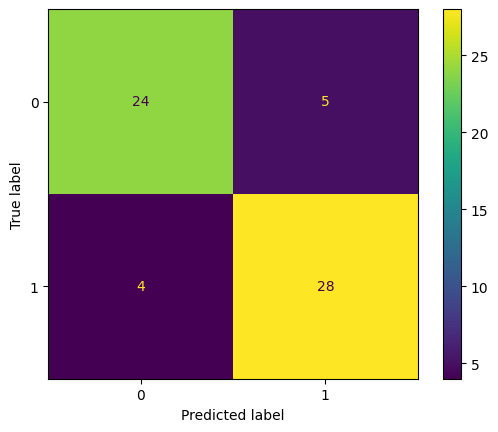

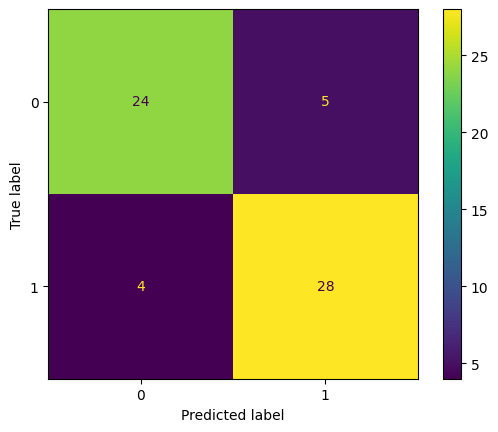

In [8]:
# confusion matrix from predictions using metric functions
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline
ConfusionMatrixDisplay.from_predictions(y_test,
                                       y_preds)

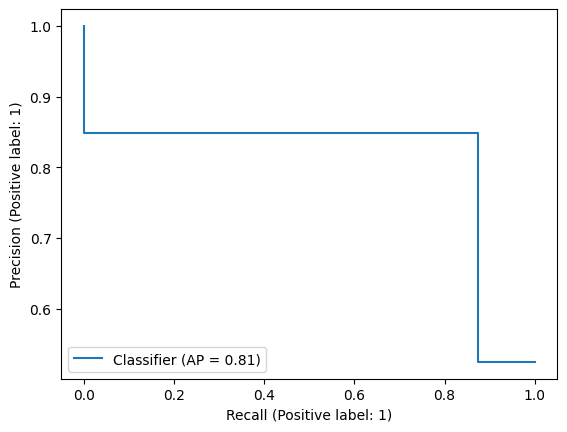

In [12]:
# precisionRecallDisplay.from_predictions
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_test,
                                       y_preds)

## 4.3 Using different evaluation metrisc as sklearn functions 

The 3rd way to evaluate sklearn ML models/estimators is to use the `sklearn.metrics` module

In [8]:
# classification problem and we import the commonly used metrics for classification 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=heart_disease.drop('target',axis=1)
y=heart_disease.target

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
y_preds=clf.predict(X_test)
print(f"The accuracy is {accuracy_score(y_test,y_preds)}")

The accuracy is 0.8524590163934426


In [9]:
print(f"The precision is {precision_score(y_test,y_preds)}")

The precision is 0.8484848484848485


In [10]:
print(f"The recall is {recall_score(y_test,y_preds)}")

The recall is 0.875


In [19]:
f1_score(y_test,y_preds)

0.8615384615384615

In [11]:
# regression problem and we import the commonly used evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X=housing_df.drop('target',axis=1)
y=housing_df.target

X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [12]:
y_preds=model.predict(X_test)
r2_score(y_test,y_preds)

0.8057036267903255

In [13]:
mean_absolute_error(y_test,y_preds)

0.3271080749515505

In [14]:
mean_squared_error(y_test,y_preds)

0.25460771189360204

## 5. Improving the model

First predictions = baseline predictions
First model = baseline model

2 ways to improve the model:-

1. From a data perspective
* Could we collect more data? (generally, the more the data, the better)
* Could we improve our data?

2. From a model perspective
* Is there a better model we can use.
* Could we improve the current model(in case we use ensemble model)?

Parameters vs Hyperparameters

- Parameters = model finds the patterns in the data.
- Hyperparameters = settings on a model that you can adjust to (potentially) improve its ability to find patterns.


3 ways to adjust hyperparameters:-
1. By hand 👏
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [2]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We call these hyperparameters, but in python terms, these are called parameters.

## 5.1 Tuning hyperparameters by hand

Let's make 3 sets train, validation and test sets.

In [4]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

After going through the documentation of this estimator, we are going to adjust the following:
add images 

- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_smaples_split`
- `n_estimators`

Whose meanings will be in the documentation.

In [5]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision on y_true labels vs y_pred labels
    on a classification.
    This is just an evaluation function for our classification problem.
    """
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)


    #creating a dictionary which stores these values(metric values)
    metric_dict={'accuracy':round(accuracy,2),
                 'precision':round(precision,2),
                 'recall':round(recall,2),
                 'f1':round(f1,2)}

    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [9]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
# because we need to create train, test and dev sets manually through indexing.
heart_disease_shuffled=heart_disease.sample(frac=1)

# split into X and y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled.target

# split the data into train, validation and test sets
train_split=round(0.7*len(heart_disease_shuffled)) # 70% of data
valid_split=round(train_split+0.15*len(heart_disease_shuffled)) # 15% of data

X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

clf=RandomForestClassifier() # instantiates the classifeir with baseline hyperparameters

clf.fit(X_train,y_train)

# make predictions on validation set(baseline predictions)
y_preds=clf.predict(X_valid)

#evaluate the classifier on validation set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [10]:
len(X_train),len(X_valid),len(X_test)

(212, 45, 46)

In [19]:
np.random.seed(42)

#creating a second classifier with different hyperparameters
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# make predictions on validation set
y_preds_2=clf_2.predict(X_valid)

# evaluate the 2nd classfier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)
clf_2_metrics

Acc: 48.89%
Precision: 0.67
Recall: 0.16
F1 score: 0.26


{'accuracy': 0.49, 'precision': 0.67, 'recall': 0.16, 'f1': 0.26}

In [ ]:
clf_3=RandomForestClassifier(n_estimators=100,
                             max_depth=10)

Tuning these hyperparameters by hand takes a lot of time. Therefore we have an sklearn module called RandomizedSearchCV which tries a bunch of hyperparameters for our model and gives us the best hyperparameters.

## 5.2 Tuning hyperparameters with RandomisedSearchCV


In [20]:
from sklearn.model_selection import RandomizedSearchCV

# we create a grid of estimators we'd like to adjust
# we'll pass hyperparameter name as key and its values we'd like as values 
grid={'n_estimators':[10,100,200,500,1000,1200],
      'min_samples_split':[2,4,6],
      'max_features':['auto','sqrt'],
      'max_depth':[None,5,10,20,30],
      'min_samples_leaf':[1,2,4]}

#we select these values after reading ans researching from the doc of the RandomizedSearchCV

np.random.seed(42)

# split X and y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled.target

# split into train and test splits
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# instantiate the classifier
clf=RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,
param_distributions=grid,
                         n_iter=10,# number of models to try
                         cv=5,
                         verbose=2)

# fit the randomized version of clf
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-li

This Randomised Search CV is going to search over the grid for 10 different times, different combinations of these parameters at random.

It is going to figure out which combinations of hyperparameters is doing the best.

In [12]:
rs_clf.best_params_
# gives the best set of hyperparameters 

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [21]:
# make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

# evaluate predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


The benefit if this is that instead of searching for the best hyperparameters by hand, this gives us a way to simply the search for the best hyperparameters combination. 

The workflow for runing hyperparameters is that:- 
1. Start by hand
2. Then RandomizedSearchCV
3. Then GridSearchCV

## 5.3 Hyperparameter tuning with GridSearchCV

In [12]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'min_samples_split': [2, 4, 6],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [None, 5, 10, 20, 30],
 'min_samples_leaf': [1, 2, 4]}

Difference between RandomizedSearchCV vs GridSearchCV is the RandomizedSearchCV had paramter called as `n_iters` to limit the number of models to try whereas GridSearchCV uses a brute force search through the entire grid, matlab searches the entire combination of parameters in grid.

There are altogether 2700 combinations including the 5 fold CV. This is not feasible for laptop therefore we reduce the search space.

In [15]:
# we take the best hyperparameter values we got usinf rs_clf and remove the values which are away from those best hyperparameter values
grid_2={'n_estimators':[100,200,500],
        'max_depth':[None],
        'max_features':['auto','sqrt'],
        'min_samples_split':[6],
        'min_samples_leaf':[1,2]
       }

Now the search space is reduced to just 12*5 including 5 fold CV.

Since we are using CV, we don't split X and y into valid test.

In [16]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

#split into X and y
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease.target

#split into train and test splits
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#instantiate the model
clf=RandomForestClassifier(n_jobs=1)

#set up GridSearchCV
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)

# fit the GridSearchCV
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/data/user/0/ru.iiec.pydroid3/files/aarch64-li

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [17]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [18]:
gs_clf_ypreds=gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_clf_ypreds)
gs_metrics

Acc: 49.18%
Precision: 0.51
Recall: 0.59
F1 score: 0.55


{'accuracy': 0.49, 'precision': 0.51, 'recall': 0.59, 'f1': 0.55}

Let's compare different metrics

In [22]:
compare_metrics=pd.DataFrame({'baseline':baseline_metrics,
                              'clf_2':clf_2_metrics,
                              'rs metrics':rs_metrics,
                              'gs metrics':gs_metrics})

In [23]:
compare_metrics

,baseline,clf_2,rs metrics,gs metrics
accuracy,0.82,0.49,0.82,0.49
precision,0.81,0.67,0.77,0.51
recall,0.88,0.16,0.86,0.59
f1,0.85,0.26,0.81,0.55


<Axes: >

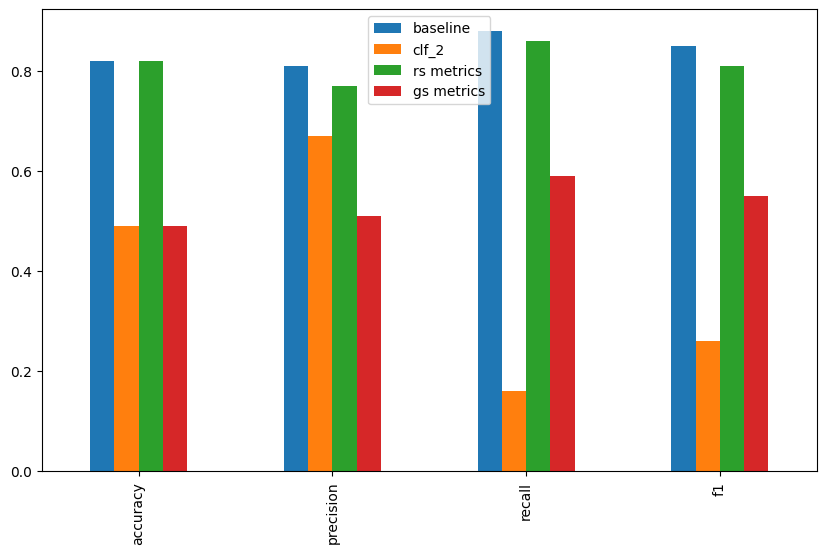

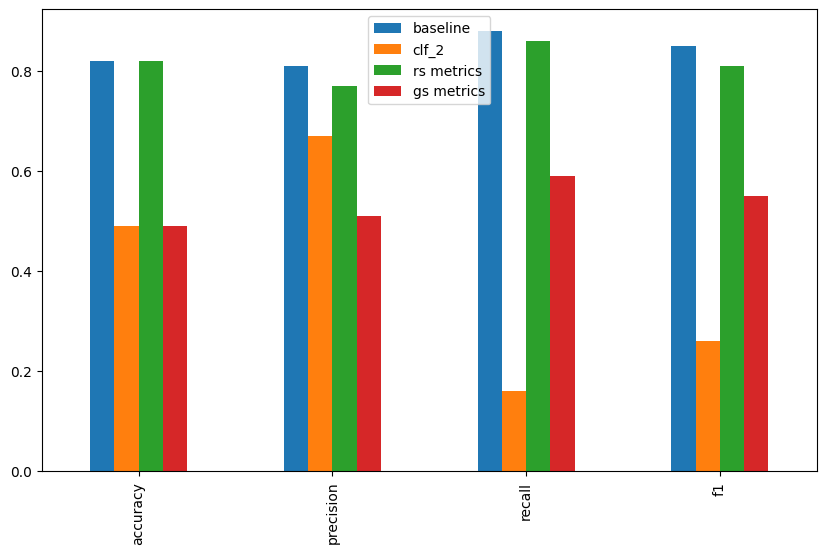

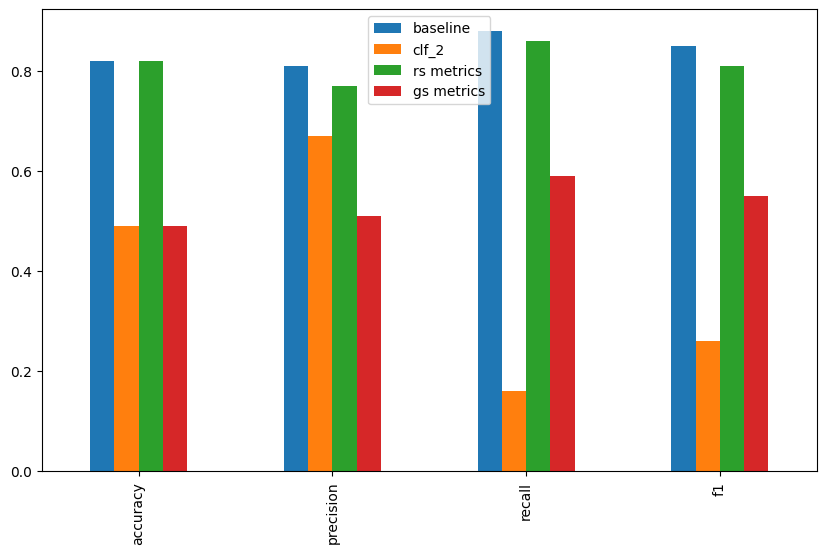

In [27]:
%matplotlib inline
compare_metrics.plot.bar(figsize=(10,6))

## 6. Saving and loading trained ML models

There are two ways to save and load ML models:-

1. With python's `pickle` module
2. With python's `joblib` module

**Pickle**

In [30]:
import pickle

#save an existing model to a file
pickle.dump(gs_clf,open('gs_random_forest_model_1.pkl','wb'))

In [31]:
# load a saved model
loaded_pickle_model=pickle.load(open('gs_random_forest_model_1.pkl','rb'))

In [34]:
# make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test)
pickle_metrics=evaluate_preds(y_test,pickle_y_preds)

Acc: 42.62%
Precision: 0.41
Recall: 0.54
F1 score: 0.46


**Joblib**

In [36]:
from joblib import dump,load

#save model to file
dump(gs_clf,filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [37]:
# import saved joblin model
loaded_job_model=load(filename='gs_random_forest_model_1.joblib')

In [39]:
# make and evaluate joblib predictions
joblib_y_preds=loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 42.62%
Precision: 0.41
Recall: 0.54
F1 score: 0.46


{'accuracy': 0.43, 'precision': 0.41, 'recall': 0.54, 'f1': 0.46}

If you're model is big, then use joblib else use pickle

## 7. Putting it all together


In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [4]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [5]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps:- (all in one cell)

1. Fill the missing data
2. Convert the data into numbers
3. Build an ML model on the data 

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Set random seed
import numpy as np
np.random.seed(42)

# Import data
data = pd.read_csv('https://raw.githubusercontent.com/Shuraimi/zero-to-mastery-ai-ml-course/main/data/car-sales-extended-missing-data.csv')

# Drop rows with missing 'Price'
data.dropna(subset=['Price'], inplace=True)

# Define features
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Define transformers
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values and encode to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_features),
        ('doors', door_transformer, door_features),
        ('num', num_transformer, num_features)
    ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

# Split data into X and y
X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model Score:", score)

Model Score: 0.22188417408787875


Note:- The paranthesis should be correct.

It is a list of tuples, don't invlude another paranthesis.

It's also possible to use `GridSearchCV` and `RandomizedSearchCV` with our `Pipeline`.

In [ ]:
# use GridSearchCV with out Regression pipeline
pipe_grid={
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':[1],
    'model__min_samples_split':[2,4]
}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=1, model__min_samples_split=2, model_

In [24]:
gs_model.get_params_

AttributeError: 'GridSearchCV' object has no attribute 'get_params_'

In [25]:
model.get_params_

AttributeError: 'Pipeline' object has no attribute 'get_params_'